In [3]:
import pandas as pd

# Carrega o dataset
df = pd.read_csv("Dataset\googleplaystore_user_reviews.csv")
df.dropna(subset=['Translated_Review'], inplace=True)  # Remove avaliações vazias
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
C:\Users\gabri\AppData\Local\Temp\ipykernel_4784\3844158696.py:4: SyntaxWarning: invalid escape sequence '\g'
  df = pd.read_csv("Dataset\googleplaystore_user_reviews.csv")


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [21]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_review'] = df['Translated_Review'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_review'].apply(get_sentiment)
df['sentiment'].value_counts

<bound method IndexOpsMixin.value_counts of 0        positive
1        positive
3        positive
4        positive
5        positive
           ...   
64222    positive
64223    positive
64226    negative
64227    positive
64230    negative
Name: sentiment, Length: 37427, dtype: object>

C:\Users\gabri\AppData\Local\Temp\ipykernel_4784\3243012233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


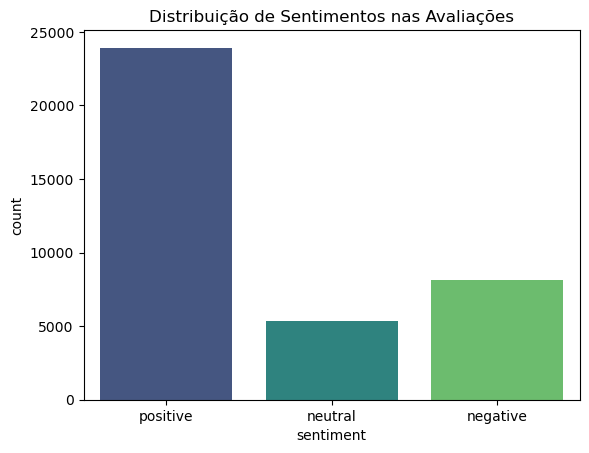

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribuição de Sentimentos nas Avaliações')
plt.show()

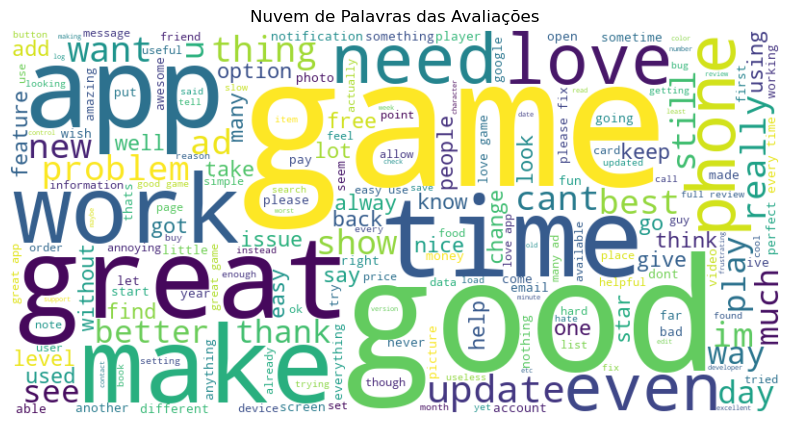

In [26]:
from wordcloud import WordCloud

all_words = ' '.join(df['clean_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Avaliações')
plt.show()